<a href="https://colab.research.google.com/github/srt3000/CE888/blob/main/Assignment2/Firevsnonfire_Approach2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.callbacks import ModelCheckpoint
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import glob
import cv2

In [ ]:
train_path = 'D:/Uni/CE888- Data science/Fire-vs-NoFire/Training'
test_path = 'D:/Uni/CE888- Data science/Fire-vs-NoFire/Test/'

# Preprocessing the images using image generator



In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        #target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = train_datagen.flow_from_directory(
        test_path,
        #target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Fire': 0, 'No_Fire': 1}
{'Fire': 0, 'No_Fire': 1}


Training steps should be the number of images in training folder divided by the batch size which is 16

Validation steps should be the number of images in training folder for validation divided by the batch size which is 16

In [ ]:
train_steps = train_generator.n // train_generator.batch_size    
valid_steps = validation_generator.n // validation_generator.batch_size



In [ ]:
train_generator.image_shape

(256, 256, 3)

In [ ]:
train_image_names = glob.glob('D:/Uni/CE888- Data science/Fire-vs-NoFire/Training/*/*.jpg')
train_Fire_image_names = glob.glob('D:/Uni/CE888- Data science/Fire-vs-NoFire/Training/Fire/*.jpg')
train_noFire_image_names = glob.glob('D:/Uni/CE888- Data science/Fire-vs-NoFire/Training/No_Fire/*.jpg')

print("Total number of training images: ", len(train_image_names))
print("number of Fire images: ", len(train_Fire_image_names))
print("number of No Fire images: ", len(train_noFire_image_names))

Total number of training images:  39375
number of Fire images:  25018
number of No Fire images:  14357


In [ ]:
# Directory with our training fire pictures
train_Fire_dir = os.path.join(train_path, 'D:/Uni/CE888- Data science/Fire-vs-NoFire/Training/Fire') 

# Directory with our training Nonfire pictures
train_Nonfire_dir = os.path.join(train_path, 'D:/Uni/CE888- Data science/Fire-vs-NoFire/Training/No_Fire')

# Directory with our validation fire pictures
validation_Fire_dir = os.path.join(test_path, 'D:/Uni/CE888- Data science/Fire-vs-NoFire/Test/Fire')

# Directory with our validation Nonfire pictures
validation_Nonfire_dir = os.path.join(test_path, 'D:/Uni/CE888- Data science/Fire-vs-NoFire/Test/No_Fire')

In [ ]:
test_image_names = glob.glob('D:/Uni/CE888- Data science/Fire-vs-NoFire/Test/*/*.jpg')
test_Fire_image_names = glob.glob('D:/Uni/CE888- Data science/Fire-vs-NoFire/Test/Fire/*.jpg')
test_noFire_image_names = glob.glob('D:/Uni/CE888- Data science/Fire-vs-NoFire/Test/No_Fire/*.jpg')

print("Total number of test images: ", len(test_image_names))
print("number of Fire images: ", len(test_Fire_image_names))
print("number of No Fire images: ", len(test_noFire_image_names))

Total number of test images:  8617
number of Fire images:  5137
number of No Fire images:  3480


# Data visualization

The train data and test data distribution is plotted below and you can see the data is imbalanced

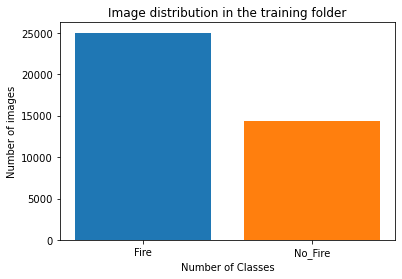

In [ ]:
#Data visualization of the training folder

plt.bar(os.listdir('D:/Uni/CE888- Data science/Fire-vs-NoFire/Training/')[0], len(train_Fire_image_names))
plt.bar(os.listdir('D:/Uni/CE888- Data science/Fire-vs-NoFire/Training/')[1], len(train_noFire_image_names))
plt.xlabel("Number of Classes")
plt.ylabel("Number of images")
plt.title("Image distribution in the training folder")
plt.show()

In [ ]:
print("Batch Size for Input Image : ",train_generator[0][0].shape)
print("Batch Size for Output Image : ",train_generator[0][1].shape)
print("Image Size of first image : ",train_generator[0][0][0].shape)

Batch Size for Input Image :  (16, 256, 256, 3)
Batch Size for Output Image :  (16,)
Image Size of first image :  (256, 256, 3)


# Display a set of 8 fire and 8 Non fire images

re-run the below cell to see random batches of images each time

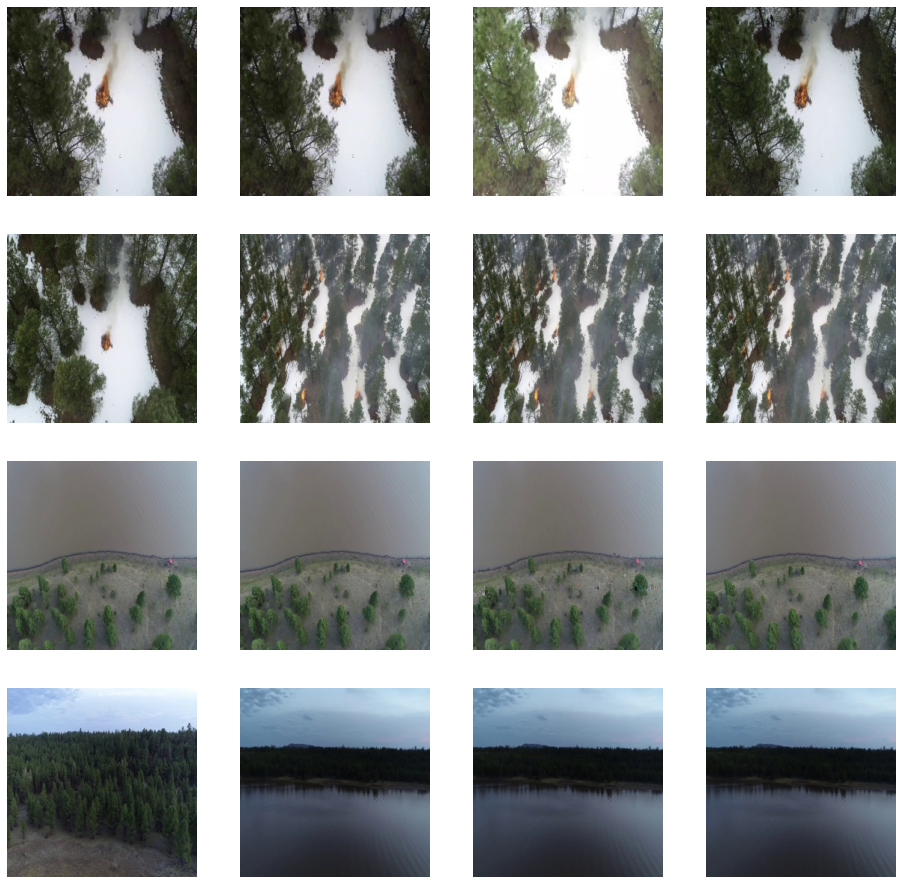

In [ ]:
#the first 8 images in the plot is fire image next 8 is non fire images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over imagesFire
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_Fire_pix = [os.path.join(train_Fire_dir, fname) 
                for fname in train_Fire_image_names[pic_index-8:pic_index]]
next_Nonfire_pix = [os.path.join(train_Nonfire_dir, fname) 
                for fname in train_noFire_image_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_Fire_pix+next_Nonfire_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=valid_steps,
        verbose=1,
        )

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
2460/2460 [==============================] - 3274s 1s/step - loss: 0.1944 - binary_accuracy: 0.9384 - val_loss: 1.6639 - val_binary_accuracy: 0.5113
Epoch 2/15
2460/2460 [==============================] - 3202s 1s/step - loss: 0.0267 - binary_accuracy: 0.9920 - val_loss: 2.2584 - val_binary_accuracy: 0.5127
Epoch 3/15
2460/2460 [==============================] - 3132s 1s/step - loss: 0.0159 - binary_accuracy: 0.9956 - val_loss: 2.4654 - val_binary_accuracy: 0.4361
Epoch 4/15
2460/2460 [==============================] - 3050s 1s/step - loss: 0.0086 - binary_accuracy: 0.9977 - val_loss: 2.4832 - val_binary_accuracy: 0.5424
Epoch 5/15
2460/2460 [==============================] - 3051s 1s/step - loss: 0.0088 - binary_accuracy: 0.9976 - val_loss: 3.8221 - val_binary_accuracy: 0.5549
Epoch 6/15
2460/2460 [==============================] - 3057s 1s/step - loss: 0.0070 - binary_accuracy: 0.9981 - val_loss: 1.7109 - val_binary_accuracy: 0.5107
Epoch 7/15
2460/2460 [==================

In [ ]:
model.save('D:/Uni/CE888- Data science/Fire-vs-NoFire/fifteenepoch.hdf5')

In [ ]:
model.load_weights('D:/Uni/CE888- Data science/Fire-vs-NoFire/fifteenepoch.hdf5')

In [ ]:
checkpointer = ModelCheckpoint(filepath='D:/Uni/CE888- Data science/Fire-vs-NoFire/fifteenepoch.hdf5', verbose=1, save_best_only=True)

# Metrics(Accuracy) and plots(training/validation accuracy and loss)

In [ ]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'] )
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy  ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_path,
        batch_size=32,
        class_mode='binary')

test_steps = test_generator.n // test_generator.batch_size

Found 8617 images belonging to 2 classes.


In [ ]:
model.evaluate_generator(test_generator, verbose=1, steps=test_steps)

C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


269/269 [==============================] - 126s 469ms/step - loss: 2.2674 - binary_accuracy: 0.5893


[2.2674026489257812, 0.5893355011940002]

# Predictions

In [ ]:
preds = model.evaluate_generator(test_generator)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Loss = 2.2676403522491455
Test Accuracy = 0.5894162654876709


# Classifier Using Transfer Learning

In [ ]:
import os

import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
keras.backend.clear_session()

## Creating Inception Net bottleneck features for train and test sets

In [ ]:
batch_size = 32

In [ ]:
model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

87916544/87910968 [==============================] - 59s 1us/step


In [ ]:
bottleneck_features_train = model2.predict_generator(train_generator, verbose=1)

 775/2461 [========>.....................] - ETA: 19:40

In [ ]:
model2.summary()

In [ ]:
bottleneck_features_train.shape

In [ ]:
np.savez('inception_features_train', features=bottleneck_features_train)

In [ ]:
bottleneck_features_test = model2.predict_generator(test_generator, 8617/batch_size, verbose=1)
np.savez('inception_features_test', features=bottleneck_features_test)

In [ ]:
train_data = np.load('inception_features_train.npz')['features']

In [ ]:
train_data.shape

In [ ]:
train_labels = np.array([0] * 7500 + [1] * 7500)

In [ ]:
train_labels.shape

In [ ]:


test_data = np.load('inception_features_test.npz')['features']
test_labels = np.array([0] * 322 + [1] * 322)



In [ ]:
classes = test_generator.class_indices
class_names = []
for key in classes.keys():
    class_names.append(key)
print(class_names)